# 硬投票表决

In [1]:
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### 使用Sklearn中moon数据集

In [2]:
X,y = make_moons(n_samples=7000,noise=0.1)

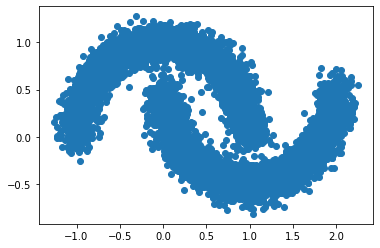

In [3]:
plt.scatter(X[:,0],X[:,1])

### 数据集分割

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=42)

### 定义三个基分类器
 - 逻辑回归
 - 决策树
 - SVM

In [5]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC()

### 定义投票分类器

In [10]:
voting = VotingClassifier(
    estimators=[('lr',lr),('rf',dt),('svc',svm)],
    voting='hard'
)

### 输出各个分类器的准确率

In [11]:
for clf in (lr,dt,svm,voting):
    clf.fit(X_train,y_train)
    y_hat = clf.predict(X_test)
    print(clf.__class__.__name__,'=',accuracy_score(y_test,y_hat))

LogisticRegression = 0.8725714285714286
DecisionTreeClassifier = 0.9982857142857143
SVC = 0.9988571428571429
VotingClassifier = 0.9982857142857143
